# Generate and visualize filter strengths

_Author: Nhi Nguyen_

In [1]:
%load_ext autoreload
%autoreload 2

## 1. Generate and save filter strengths

In [2]:
from src.get_viz_data import get_deciphering_rna_splicing_data
exons = [
    'GCGGCACCTACTACAATGTCCCCCGCTGCATACACTCGGAGCCAATAGGGCGCCTATAGAGTGTAGTCCT',
    'TCGCACCGCAGGTTCGGTTTTTTGGTATAATACGCGGCACTCCAAAATTACTCTGGGGCACCCTCACCAG',
    'GCCCGAAAGCTCCCTACTGCAGTTTACGACCCTTAAGGCTTGGGTGCTCTTACGCGCTGATCGATATAAG',
    'CCCTACCCGCCCTCGTCCCCAGGACACCCTTTCCGCCGCAAGTTATCCGCCAAGTACACAACTTAATGGT',
    'GGTGTCCCCCACTATCGACCTCATCAGTAATCAATCCGAGCGACCGCCTCATCCCAAAGGCACACGTCCA'
]
csv_file = "data/deciphering_rna_splicing.csv"
csv_data = get_deciphering_rna_splicing_data(exons=exons, csv_file=csv_file)

1/1 [==============================] - 0s 12ms/step


## 2. Load and visualize filter strengths

In [3]:
import pandas as pd
csv_data = pd.read_csv("data/deciphering_rna_splicing.csv")
print(csv_data.shape)
csv_data.head()

(450, 25)


,exon_id,exon,position,predicted_psi,delta_force,incl_bias,skip_bias,incl_1,incl_2,incl_3,...,skip_7,skip_8,skip_9,skip_11,skip_10,skip_12,skip_p,skip_s,skip_dot,skip_blank
0,0,GCGGCACCTACTACAATGTCCCCCGCTGCATACACTCGGAGCCAAT...,0,0.113966,-16.232149,21.808094,0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
1,0,GCGGCACCTACTACAATGTCCCCCGCTGCATACACTCGGAGCCAAT...,1,0.000000,0.000000,0.000000,0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
2,0,GCGGCACCTACTACAATGTCCCCCGCTGCATACACTCGGAGCCAAT...,2,0.000000,0.000000,0.000000,0,2.406730e-05,3.051553e-07,2.134268e-06,...,1.473838e-07,3.248956e-07,1.168151e-15,3.718131e-07,0.000000e+00,1.328008e-08,0.006624,0.007988,1.411970e-07,2.861605e-10
3,0,GCGGCACCTACTACAATGTCCCCCGCTGCATACACTCGGAGCCAAT...,3,0.000000,0.000000,0.000000,0,6.198072e-07,8.393712e-07,1.181085e-07,...,1.388681e-07,5.003432e-11,4.009794e-07,3.432117e-08,1.185070e-11,6.520578e-09,0.002541,0.000917,1.306813e-07,6.451252e-09
4,0,GCGGCACCTACTACAATGTCCCCCGCTGCATACACTCGGAGCCAAT...,4,0.000000,0.000000,0.000000,0,4.109646e-12,6.462889e-10,4.176614e-07,...,3.128267e-08,1.709166e-06,5.777560e-06,4.492362e-08,8.704890e-08,3.743523e-10,0.015760,0.000014,5.997204e-08,5.870180e-09


In [4]:
exon_id = 0
data = csv_data[csv_data["exon_id"] == exon_id]
print(data.shape)
exon = data['exon'].iloc[0]
exon = exon.replace("T", "U")
print(exon)

(90, 25)
GCGGCACCUACUACAAUGUCCCCCGCUGCAUACACUCGGAGCCAAUAGGGCGCCUAUAGAGUGUAGUCCU


## Example: Plots

In [5]:
import matplotlib.pyplot as plt
from src.figutils import add_flanking

FILTER_NAMES = {
    "incl_bias": "B", "skip_bias": "B",
    "incl_1": 1, "incl_2": 2, "incl_3": 3, "incl_4": 4, "incl_5": 5, "incl_6": 6,
    "skip_7": 7, "skip_8": 8, "skip_9": 9, "skip_10": 10, "skip_11": 11, "skip_12": 12, 
    "skip_s": "S", "skip_p": "P" ,
    # "incl_7": "7", "incl_struct_1": "1s", "skip_blank": "_", "skip_dot": "."
}

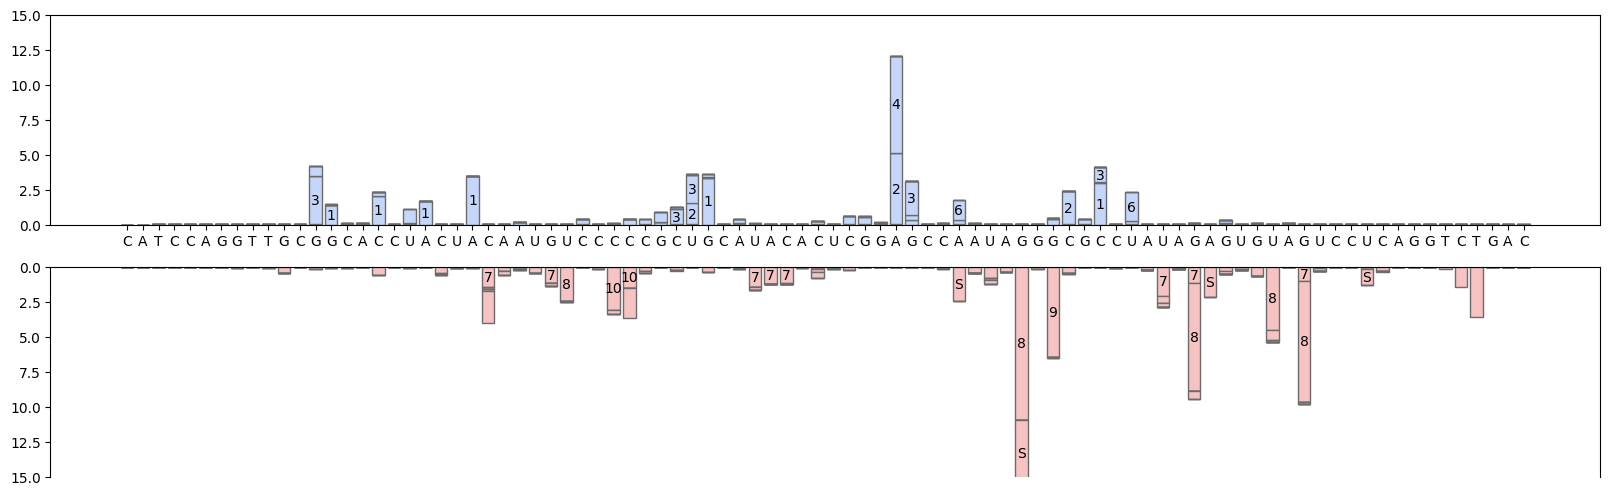

In [6]:
# Get data
positions = data['position']
incl_position_forces = data.iloc[:,7:15]
incl_position_forces_cumsum = incl_position_forces.cumsum(axis=1)
skip_position_forces = data.iloc[:,15:]
skip_position_forces_cumsum = skip_position_forces.cumsum(axis=1)

# Set up figures
fig, axes = plt.subplots(2, figsize=(20, 6))
axes[0].set_ylim((0, 15))
axes[0].set_xticks(positions)
axes[0].set_xticklabels(add_flanking(exon, 10))
axes[1].set_ylim((0, 15))
axes[1].invert_yaxis()
axes[1].set_xticks([])
axes[1].spines['top'].set_visible(True)
axes[1].spines['bottom'].set_visible(False)

# Plot
axes[0].bar(positions, incl_position_forces.iloc[:,0], color='#c5d6fb', edgecolor='#6b6b6b')
for pos in positions:
    if incl_position_forces.iloc[pos,0] > 1:
        axes[0].annotate(FILTER_NAMES[incl_position_forces.iloc[:,0].name], 
                         (pos, incl_position_forces_cumsum.iloc[pos,0] - incl_position_forces.iloc[pos,0]/2), 
                            ha='center', va='center', fontsize=10)
for i in range(1, incl_position_forces.shape[1]):
    column = incl_position_forces.iloc[:,i].name
    filter = FILTER_NAMES[column] if column in FILTER_NAMES.keys() else ""
    axes[0].bar(positions, incl_position_forces.iloc[:,i], 
                bottom=incl_position_forces_cumsum.iloc[:,i-1], color='#c5d6fb', edgecolor='#6b6b6b')
    for pos in positions:
        if incl_position_forces.iloc[pos,i] > 1:
            axes[0].annotate(filter, 
                             (pos, incl_position_forces_cumsum.iloc[pos,i] - incl_position_forces.iloc[pos,i]/2), 
                             ha='center', va='center', fontsize=10)
axes[1].bar(positions, skip_position_forces.iloc[:,0], color='#f6c3c2', edgecolor='#6b6b6b')
for pos in positions:
    if skip_position_forces.iloc[pos,0] > 1:
        axes[1].annotate(FILTER_NAMES[skip_position_forces.iloc[:,0].name], 
                         (pos, skip_position_forces_cumsum.iloc[pos,0] - skip_position_forces.iloc[pos,0]/2), 
                            ha='center', va='center', fontsize=10)
for i in range(1, skip_position_forces.shape[1]):
    column = skip_position_forces.iloc[:,i].name
    filter = FILTER_NAMES[column] if column in FILTER_NAMES.keys() else ""
    axes[1].bar(positions, skip_position_forces.iloc[:,i], 
                bottom=skip_position_forces_cumsum.iloc[:,i-1], color='#f6c3c2', edgecolor='#6b6b6b')
    for pos in positions:
        if skip_position_forces.iloc[pos,i] > 1:
            axes[1].annotate(filter, 
                             (pos, skip_position_forces_cumsum.iloc[pos,i] - skip_position_forces.iloc[pos,i]/2), 
                             ha='center', va='center', fontsize=10)
plt.show()

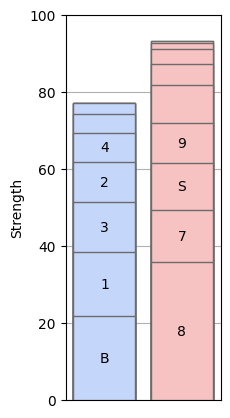

In [7]:
# Get data
incl_forces = data.iloc[:,5:15].sum(axis=0).sort_values(ascending=False)
incl_forces_cumsum = incl_forces.cumsum()
skip_forces = data.iloc[:,15:].sum(axis=0).sort_values(ascending=False)
skip_forces_cumsum = skip_forces.cumsum()

# Set up figures
fig, ax = plt.subplots(figsize=(2, 5))
ax.set_ylim((0, 100))
ax.set_ylabel("Strength")
ax.set_xlim((-1, 1))
ax.set_xticklabels([])
ax.set_xticks([])
ax.grid(axis='y', which='both', zorder=0)
ax.spines['right'].set_visible(True)

# Plot
for i in range(len(incl_forces)):
    ax.bar([-0.5], incl_forces_cumsum[i], color='#c5d6fb', edgecolor='#6b6b6b', zorder=20-i)
    if incl_forces[i] > 7 and incl_forces.keys()[i] in FILTER_NAMES.keys():
        ax.annotate(FILTER_NAMES[incl_forces.keys()[i]], (-0.5, incl_forces_cumsum[i]-incl_forces[i]/2), 
                    ha='center', va='center', zorder=20)
for i in range(len(skip_forces)):
    ax.bar([0.5], skip_forces_cumsum[i], color='#f6c3c2', edgecolor='#6b6b6b', zorder=20-i)
    if skip_forces[i] > 7 and skip_forces.keys()[i] in FILTER_NAMES.keys():
        ax.annotate(FILTER_NAMES[skip_forces.keys()[i]], (0.5, skip_forces_cumsum[i]-skip_forces[i]/2),
                    ha='center', va='center', zorder=20)
plt.show()

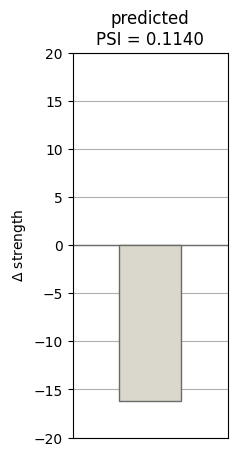

In [8]:
# Get data
delta_force = data['delta_force'].iloc[0]
predicted_psi = data['predicted_psi'].iloc[0]

# Set up figures
fig, ax = plt.subplots(figsize=(2, 5))
ax.set_ylim((-20, 20))
ax.set_ylabel("$\Delta$ strength")
ax.set_xlim((-1, 1))
ax.plot([-1,1],[0,0],color='#6b6b6b',linewidth=1)
ax.set_xticklabels([])
ax.set_xticks([])
ax.grid(axis='y', which='both', zorder=0)
ax.spines['right'].set_visible(True)

# Plot
ax.bar([0], [delta_force], color='#dad7cd', edgecolor='#6b6b6b', zorder=2)
ax.set_title(f"predicted\nPSI = {predicted_psi:.4f}")
plt.show()